# Conll Exploratroy Data Analasis

## tag statistic
- cost sensitive method

## sentence length distribution
- bert input pre-process

In [35]:
def getData(path):
    with open(path, 'r', encoding='utf8') as file:
        data_text = file.readlines()
    
    X, Y, x, y = list(), list(), list(), list()
    for sample in data_text:
        if sample != '\n':
            item = sample.split(' ')
            x.append(item[0])
            y.append(item[-1].replace('\n', ''))
        else:
            X.append(x)
            Y.append(y)
            x, y = list(), list()
            
    return X, Y

In [155]:
train_x, train_y = getData('data/eng.train')
test_x, test_y = getData('data/eng.testa')
val_x, val_y = getData('data/eng.testb')

## tag statistic

In [116]:
import pandas as pd
import seaborn as sns

def label_distribution(label: list):
    d = pd.DataFrame([tag for tags in label for tag in tags])
    count = d[0].value_counts()
    sns.barplot(x=count.values, y=count.keys())

In [170]:
train_set = set([tag for tags in train_y for tag in tags])
test_set = set([tag for tags in test_y for tag in tags])
val_set = set([tag for tags in val_y for tag in tags])

with open('data/label.txt', 'a', encoding='utf8') as file:
    for tag in train_set:
        file.write(str(tag)+'\n')

print(len(train_set), len(test_set), len(val_set), len(train_set|test_set|val_set))

8 6 8 8


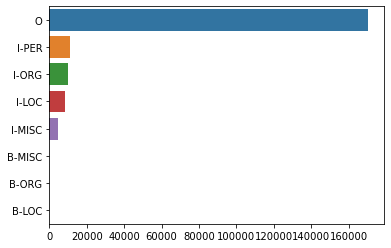

In [157]:
label_distribution(train_y)

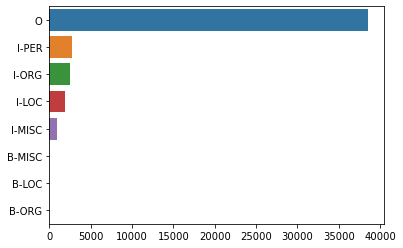

In [160]:
label_distribution(val_y)

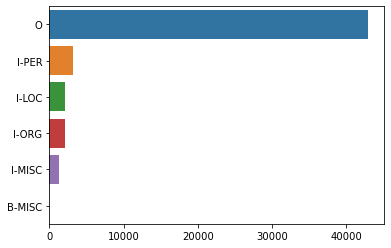

In [161]:
label_distribution(test_y)

## sentence length distribution

In [123]:
def length_distribution(x):
    sns.distplot([len(sentence) for sentence in x])

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


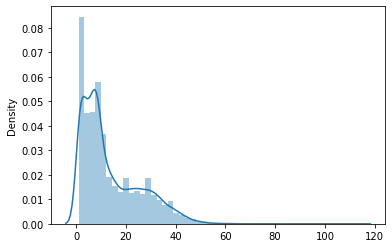

In [162]:
length_distribution(train_x)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


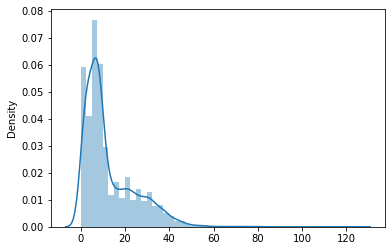

In [163]:
length_distribution(val_x)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


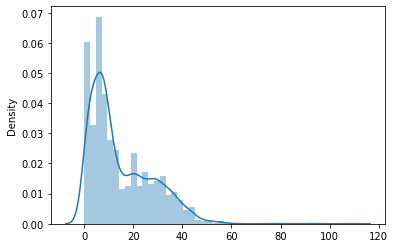

In [164]:
length_distribution(test_x)

## KS-test
p-value < 0.05 ==> reject the null hypothesis: train, val and test (length) are from different distribution

In [167]:
from scipy.stats import ks_2samp

norm1 = [len(sentence) for sentence in train_x]
norm2 = [len(sentence) for sentence in val_x]
norm3 = [len(sentence) for sentence in test_x]

tv_ks_value = ks_2samp(norm1, norm2)
print("train-val\n", tv_ks_value)

tt_ks_value = ks_2samp(norm1, norm3)
print("train-test\n", tt_ks_value)

train-val
 KstestResult(statistic=0.06624456441647386, pvalue=1.0012914282449161e-11)
train-test
 KstestResult(statistic=0.048778282696471664, pvalue=2.92854628704617e-06)


In [172]:
with open('data/label.txt', 'r', encoding='utf8') as file:
    tags = file.read().split('\n')

tag_dict = dict()
for idx, t in enumerate(tags):
    if t:
        tag_dict[t] = idx
        
tag_dict

{'I-MISC': 0,
 'B-LOC': 1,
 'B-ORG': 2,
 'B-MISC': 3,
 'I-PER': 4,
 'I-ORG': 5,
 'I-LOC': 6,
 'O': 7}